# INICIALIZAÇÃO



In [1]:
#para conectar ao Drive
from google.colab import drive # Carrega biblioteca para montar e carregar drive
drive.mount('/content/drive') # Esse código pedirá autenticação

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir("/content/drive/My Drive/Colab Topicos")
# verificar qual sua pasta no drive

In [3]:
# lista conteúdo da pasta
!ls

cars.csv	 concreto.csv	    Espaço.csv	Ratos.csv
casasBoston.csv  Dataset_spine.csv  kddCup.txt	vinho.txt


### Importacao de bibliotecas
[Biblioteca pandas](https://pandas.pydata.org/)

[Biblioteca numpy](https://numpy.org/)

[Biblioteca matplotlib](https://matplotlib.org)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carregamento da Base

In [5]:
#Carregar a base e visualizar primeiras linhas
df1 = pd.read_csv('casasBoston.csv', header=0)  #header=none indica que não há linha de cabeçalho
df1.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9


In [6]:
#dimnesões da base
df1.shape

(333, 14)

In [7]:
df1.dtypes

ID           int64
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
lstat      float64
medv       float64
dtype: object

### Indicar a semente inicial e para divisão da base em treino e teste
[Sobre numpy random](https://numpy.org/doc/stable/reference/random/index.html)

[Biblioteca sklearn](https://scikit-learn.org/stable/)



In [8]:
import random
np.random.seed(1) #semente inicial
nlinhas = df1.shape[0]
nlinhas

333

# Divisão em treino e teste

In [9]:
# divisão dos dados entre treino e teste

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1.loc[:,'crim':'lstat'], df1.loc[:,'medv'], test_size=0.1)
                                 
                                 # train_test_split(-----------inputs--------------------,-----outputs-----, percentual para teste)  

# x_train -> entrada de dados para treino - 80% dos dados de input
# y_train -> rotulos de dados para treino - 80% dos dados de output

# x_test -> entrada de dados para teste - 20% dos dados de input
# y_test -> rotulos de dados para teste - 20% dos dados de output

In [10]:
x_train.shape

(299, 12)

In [11]:
y_train.shape

(299,)

In [12]:
x_test.shape

(34, 12)

In [13]:
y_test.shape

(34,)

## **Normalizando os Dados**
Redes neurais são treinadas com dados numéricos normalizados, ou seja, entre 0 e x ou entre -x e +x.

In [14]:
from sklearn import preprocessing
preprocessParams = preprocessing.StandardScaler().fit(x_train)
# nessa normalização o valor é subtraído da média e o resultado é dividido pelo desvio padrão.
# elimina o viés do tamanho do dado, ou seja, sua ordem de grandeza. O que interessa é a importância do dado.

In [15]:
X_train_normalized = preprocessParams.transform(x_train)
X_test_normalized  = preprocessParams.transform(x_test)
# gera um objeto não dataframe

In [16]:
X_train_normalized = pd.DataFrame(X_train_normalized, columns = x_train.columns.values)
X_test_normalized = pd.DataFrame(X_test_normalized, columns = x_test.columns.values)

In [17]:
X_train_normalized.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.818558,-0.474336,0.970620,-0.253095,1.109086,0.162908,0.991039,-0.893816,1.632004,1.487015,0.804688,1.631894
1,-0.446841,-0.474336,-1.268889,-0.253095,-0.582981,0.999336,-0.318557,-0.460895,-0.762237,-1.273062,-0.365886,-1.033744
2,-0.056059,-0.474336,1.182543,-0.253095,0.453521,-0.226031,0.899508,-0.735293,-0.534214,-0.047658,-1.877876,-0.365934
3,-0.449899,1.012820,-0.749105,-0.253095,-1.070225,0.455658,-0.952232,0.878253,-0.306191,-0.479467,-1.195042,-0.409335
4,-0.409754,-0.474336,1.513314,-0.253095,0.621842,-0.614971,0.983998,-0.641497,-0.648226,0.150741,1.292427,0.364876


In [18]:
# alguns dados estatisticos por atributo apos normalizar
X_train_normalized.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
count,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02
mean,6.330870e-17,-1.188199e-17,-6.089518e-17,6.757879e-17,-1.938249e-16,1.195625e-15,5.072123e-16,-5.940993e-17,-5.606812e-17,1.232756e-16,-8.599587e-16,-1.173346e-16
std,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00
min,-4.538601e-01,-4.743364e-01,-1.515177e+00,-2.530947e-01,-1.460021e+00,-3.766911e+00,-2.163255e+00,-1.315572e+00,-9.902602e-01,-1.302239e+00,-2.902128e+00,-1.497150e+00
25%,-4.448990e-01,-4.743364e-01,-8.779768e-01,-2.530947e-01,-8.930453e-01,-5.313278e-01,-8.131751e-01,-7.949656e-01,-6.482258e-01,-7.683125e-01,-5.609813e-01,-7.747401e-01
50%,-4.234054e-01,-4.743364e-01,-2.035468e-01,-2.530947e-01,-1.931852e-01,-8.523270e-02,3.186389e-01,-3.249535e-01,-5.342143e-01,-4.444555e-01,2.681748e-01,-2.567327e-01
75%,4.906477e-02,-2.009621e-01,9.706200e-01,-2.530947e-01,6.218418e-01,4.612338e-01,9.118291e-01,7.139213e-01,1.632004e+00,1.487015e+00,8.046876e-01,5.727790e-01
max,9.571039e+00,3.899652e+00,2.350982e+00,3.951090e+00,2.810012e+00,3.431948e+00,1.145937e+00,3.502837e+00,1.632004e+00,1.749602e+00,1.292427e+00,3.576522e+00


# Treinamento da Rede Neural
[Biblioteca keras](https://keras.io/)

In [19]:
from keras import Model, Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [20]:
numClasses = 1;

In [21]:
RN = Sequential()
RN.add(Dense(30,input_shape = X_train_normalized.shape[1:], activation='relu'))
RN.add(Dense(30, activation='relu'))
#RN.add(Dense(20, activation='relu'))
RN.add(Dense(numClasses, activation='linear'))
RN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,351
Trainable params: 1,351
Non-trainable params: 0
_________________________________________________________________


In [22]:
RN.compile(optimizer='adam', loss = 'mean_squared_error', metrics=['mse','mae'])
trainedRN = RN.fit(X_train_normalized,y_train, epochs=200, batch_size=50, verbose=1, validation_split=0.1)

Epoch 1/200
6/6 [==============================] - 1s 87ms/step - loss: 598.3746 - mse: 598.3746 - mae: 22.7522 - val_loss: 595.5865 - val_mse: 595.5865 - val_mae: 22.6563
Epoch 2/200
6/6 [==============================] - 0s 15ms/step - loss: 587.1615 - mse: 587.1615 - mae: 22.4898 - val_loss: 584.0111 - val_mse: 584.0111 - val_mae: 22.3771
Epoch 3/200
6/6 [==============================] - 0s 19ms/step - loss: 576.0134 - mse: 576.0134 - mae: 22.2356 - val_loss: 572.3777 - val_mse: 572.3777 - val_mae: 22.0922
Epoch 4/200
6/6 [==============================] - 0s 10ms/step - loss: 564.9534 - mse: 564.9534 - mae: 21.9743 - val_loss: 560.3320 - val_mse: 560.3320 - val_mae: 21.7985
Epoch 5/200
6/6 [==============================] - 0s 15ms/step - loss: 552.9284 - mse: 552.9284 - mae: 21.6954 - val_loss: 547.7997 - val_mse: 547.7997 - val_mae: 21.4937
Epoch 6/200
6/6 [==============================] - 0s 15ms/step - loss: 540.6926 - mse: 540.6926 - mae: 21.4029 - val_loss: 534.3378 - val_m

In [23]:
# Gráfico do treinamento: custo do treino e validação
import matplotlib.pyplot as plt

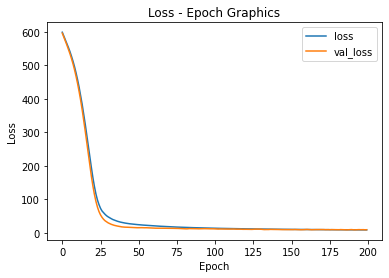

In [24]:
plt.plot(trainedRN.history['loss'], label='loss')
plt.plot(trainedRN.history['val_loss'], label='val_loss')
plt.title('Loss - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation Loss'])
plt.legend(['Loss'])
plt.legend();

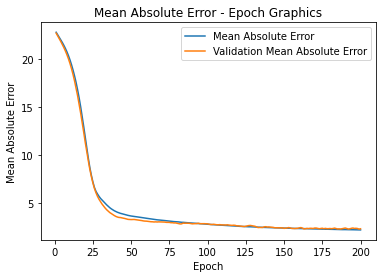

In [25]:
plt.title('Mean Absolute Error - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(range(1, len(trainedRN.history['mae']) + 1), trainedRN.history['mae'])
plt.plot(range(1, len(trainedRN.history['val_mae']) + 1), trainedRN.history['val_mae'])
plt.legend(['Mean Absolute Error'])
plt.legend(['Mean Absolute Error', 'Validation Mean Absolute Error'])
plt.show()

In [27]:
#Nesse parte ficou a dúvida sobre como plotar o gráfico de regressão